<a href="https://colab.research.google.com/github/MiguelToboYepes/BI/blob/main/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/BI /Dataset_heating_cost.csv', encoding="latin1")
df.head()

,Casa,Costo de calefacción (USD),Temp externa media (ºF),Aislamiento del atico (pulgadas),Antiguedad del calentador (años),Garaje
0,1,250,35,3,6,0
1,2,360,29,4,10,1
2,3,165,36,7,3,0
3,4,43,60,6,9,0
4,5,92,65,5,6,0


In [10]:
df.describe()

,Casa,Costo de calefacción (USD),Temp externa media (ºF),Aislamiento del atico (pulgadas),Antiguedad del calentador (años),Garaje
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,205.250000,37.200000,6.350000,7.000000,0.400000
std,5.91608,105.858831,17.410221,2.476734,3.340344,0.502625
min,1.00000,43.000000,7.000000,2.000000,1.000000,0.000000
25%,5.75000,113.500000,25.500000,5.000000,5.000000,0.000000
50%,10.50000,202.500000,35.500000,6.000000,6.500000,0.000000
75%,15.25000,276.500000,54.250000,8.000000,9.250000,1.000000
max,20.00000,400.000000,65.000000,12.000000,15.000000,1.000000


## Modelo de regresión lineal simple

$$\hat{Y}=a+bX$$

Donde:

**$\hat{Y}$**: predicción de Y  
**Y**: variable dependiente (que queremos predecir)  
**X**: variable(s) independiente(s) (predictores)  
**a**: intercepto (valor de Y cuando X = 0)  
**b**: pendiente (cuánto cambia Y por cada unidad de X)

In [11]:
Y = df['Costo de calefacción (USD)']
X = df['Temp externa media (ºF)']

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Para usar las variables de la regresión, estas deben ser tipo array
X = np.array(X).reshape(-1, 1)
Y = np.array(Y).reshape(-1, 1)

# Modelo de regresión
modelo = LinearRegression()
modelo.fit(X, Y)

# Ver coeficientes
print("Intercepto (a):", modelo.intercept_)
print("Pendiente (b):", modelo.coef_)


Intercepto (a): [388.80195166]
Pendiente (b): [[-4.93419225]]


**¿Cómo funciona la regresión?**

La idea es minimizar la suma de los errores al cuadrado, es decir:
$$Error=Y− \hat{Y}$$

Queremos minimizar:

$$Min ∑(Yi−\hat{Y})^2$$


Ahora veremos como calcular la ecuación de la regresión

$$\hat{Y}=a+bX$$

El coeficiente de la variable independiente se calcula de la siguiente manera:

$$b=\frac{∑(Xi​−\bar{X})(Yi​−\bar{Y})}{∑(Xi​−\bar{X})^2}$$​



In [13]:
b= sum((X-X.mean())*(Y-Y.mean()))/sum((X-X.mean())**2)
b

array([-4.93419225])

El intercepto se calcula de la siguiente manera

$$a=\bar{Y}−b\bar{X}$$

In [14]:
a= Y.mean()-b*X.mean()
a

array([388.80195166])

Por lo tanto, la ecuación de la regresión sería:

$$\hat{Y}=388.8 + -4.93 * X$$

Teniendo en cuenta que Y es el costo de la calefacción y X es la temperatura exterior en ºF. Si se tiene para la casa 1, una temperatura de 35 ºF, el costo de calefacción predicho es de:

$$\hat{Y}=388.8 + -4.93 * 35$$
$$\hat{Y}=216.10$$

Teniendo en cuenta que el valor real fue de 250 dolares, se tuvo un error de

$$Error=Y− \hat{Y}$$
$$Error=250− 216.10= 33.90$$

Lo que busca la regresión es minimizar la sumatoria de los errores de todas las observaciones

In [15]:
import statsmodels.api as sm

# Intercepto
X_const = sm.add_constant(X)

# Modelo de regresión
modelo_sm = sm.OLS(Y, X_const).fit()

# Imprimir el resumen del modelo (incluye la ecuación y ANOVA)
print(modelo_sm.summary())

# Obtener y mostrar los residuales
residuales = modelo_sm.resid
print("\nResiduales:")
print(residuales)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     34.72
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           1.41e-05
Time:                        14:42:11   Log-Likelihood:                -110.36
No. Observations:                  20   AIC:                             224.7
Df Residuals:                      18   BIC:                             226.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        388.8020     34.241     11.355      0.0

**Interpretación de los Resultados de la Regresión OLS**

 **R-squared (R²)**: Este valor (0.659) indica que aproximadamente el 65.9% de la variabilidad en el costo de la calefacción puede ser explicada por la temperatura externa media. Un valor más alto significa un mejor ajuste del modelo.

 **Adj. R-squared (R² ajustado)**: Similar al R-squared, pero ajustado por el número de predictores en el modelo. Es útil para comparar modelos con diferente número de variables.

 **F-statistic**: Esta es una prueba de la significancia general del modelo. Un valor alto (34.72) con una probabilidad baja (Prob (F-statistic) de 1.41e-05) sugiere que el modelo es estadísticamente significativo.

 **coef (Coeficientes):**
     const (Intercepto): El valor de 388.8020 es el costo de calefacción predicho cuando la temperatura externa es 0°F.
     x1 (Pendiente): El valor de -4.9342 indica que por cada grado Fahrenheit que aumenta la temperatura externa, el costo de la calefacción disminuye en aproximadamente 4.93 USD.

 **P>|t| (Valor p):** Estos valores prueban la significancia de cada coeficiente. Un valor p bajo (generalmente < 0.05) indica que el coeficiente es estadísticamente significativo. En tu caso, tanto el intercepto como el coeficiente de la temperatura son significativos.

 **[0.025 0.975] (Intervalo de Confianza)**: Este es el rango en el que se espera que se encuentre el verdadero valor del coeficiente con un 95% de confianza.


**Grafico de los residuales**

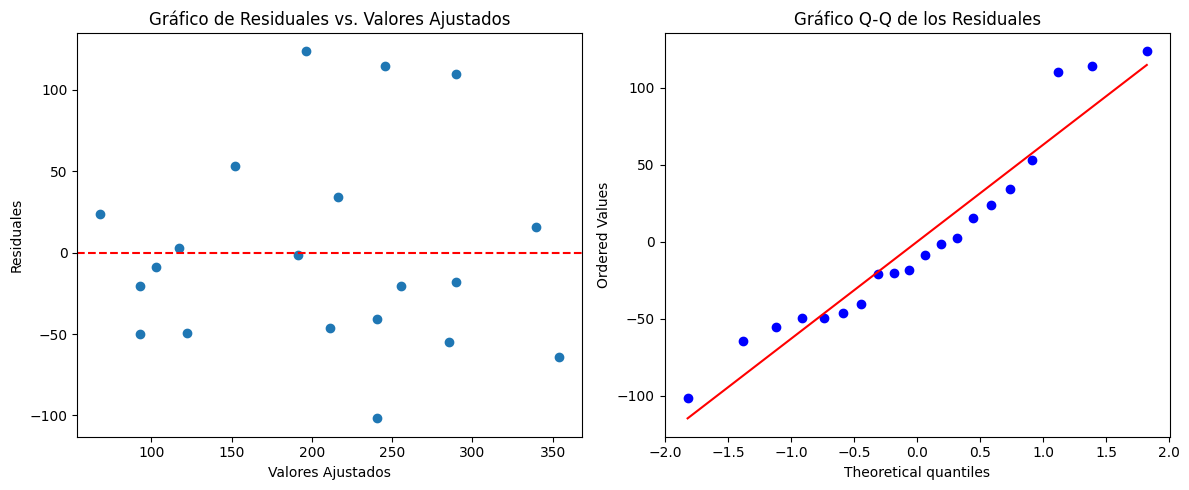

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Gráfico de residuales vs. valores ajustados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(modelo_sm.fittedvalues, residuales)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Gráfico de Residuales vs. Valores Ajustados')

# Gráfico Q-Q de los residuales
plt.subplot(1, 2, 2)
stats.probplot(residuales, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de los Residuales')

plt.tight_layout()
plt.show()

# Metricas de desempeño

In [17]:
y_real= df['Costo de calefacción (USD)']
y_pred= modelo.predict(X)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# y_real: valores verdaderos
# y_pred: valores predichos por el modelo

r2 = r2_score(y_real, y_pred)
mse = mean_squared_error(y_real, y_pred)
rmse = np.sqrt(mse)  # raíz del MSE
mae = mean_absolute_error(y_real, y_pred)

print("R^2:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

R^2: 0.6585465900839088
RMSE: 60.29129657850376
MAE: 47.677625364633975


# Ejercicio práctico
Ahora queremos mejorar el modelo, por lo tanto, vamos a probar con las otras variables independientes disponibles en el dataset, hasta obtener el mejor modelo.
Podemos hacer varios modelos de regresion lineal simple y múltiple para comparar.

# Problemas que se pueden presentar en la regresión lineal multivariante

# Multicolinealidad
- Es cuando dos o más variables independientes están fuertemente correlacionadas entre sí.

## Cómo detectarla:
- Calculando el VIF (Variance Inflation Factor): valores > 5 o 10 indican problemas.

## Soluciones:
- Eliminar variables redundantes, combinar variables, usar regresión ridge o LASSO.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definir las variables independientes
X_vif = df[['Temp externa media (ºF)', 'Aislamiento del atico (pulgadas)', 'Antiguedad del calentador (años)', 'Garaje']]

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

print(vif_data)

                            feature       VIF
0           Temp externa media (ºF)  3.434863
1  Aislamiento del atico (pulgadas)  5.685857
2  Antiguedad del calentador (años)  5.568800
3                            Garaje  2.114005


# Heterocedasticidad

- Es cuando la varianza de los errores no es constante a lo largo de los valores de X.
- Los errores estándar no son confiables → los tests estadísticos (como el p-valor) pueden ser incorrectos.

## Cómo detectarlo:
- Gráfico de residuos vs. predicciones: si hay forma de "cono", hay heterocedasticidad.
- Test de Breusch-Pagan.

##Soluciones:
- Transformar variables (log, sqrt), usar regresión robusta.